# Predicting Employee Attrition (A Classification Problem Where Recall Matters)

---------------

## Background and Objective: 

---------------

This project utilizes a fictional employee dataset to help determine an employee's likelihood of attrition. The data set was prepared by a group of IBM data scientists and can be found [here](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset).  I will explore how factors may contribute to employee attrition, including an employee's distance from home, relationship satisfaction, working overtime, etc, and I will create two classification models to predict employee attrition: `logistic regression` and `support vector machine (SVM)`. This project will also explore `precision-recall curves` to help determine the probability `threshold` for our respective algorithms which provides the best balance between precision and recall, keeping in mind that recall as a metric will be particularly useful for a company trying to predict attrition among employees.

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.linear_model import LogisticRegression

#to build SVM model
from sklearn.svm import SVC

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

#for tuning the model
from sklearn.model_selection import GridSearchCV

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**There are 1470 entries, and all columns have non-null values, indicating no missing data.**

## Dataset:

The dataset contains the following 35 columns of information regarding our employees:

* **Age**
* **Attrition** - Whether the employee left the company or not
* **BusinessTravel** - Travel related to the job (Non-Travel/Travel-Rarely/Travel_Frequently)
* **DailyRate** - Unknown
* **Department** - Department at the company
* **DistanceFromHome** - Given in km
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Masters, 5-Doctor
* **EducationField** - The employee's educational field
* **EmployeeCount** - Always 1 for each entry
* **EmployeeNumber** - Unique Employee Identifier
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender**
* **HourlyRate** - Unknown
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - from 1 to 5
* **JobRole**
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus**
* **MonthlyIncome**
* **MonthlyRate** - Unknown
* **NumCompaniesWorked** - Number of companies the employee worked at
* **Over18** - Whether they are over 18 or not (Y/N)
* **OverTime** - Do they work overtime (Y/N)
* **PercentSalaryHike** - percentage in increased salary
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Unknown
* **StockOptionLevel** - 1/2/3
* **TotalWorkingYears**
* **TrainingTimesLastYear** - The number of training sessions attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany**
* **YearsInCurrentRole**
* **YearsSinceLastPromotion**
* **YearsWithCurrManager**

In [5]:
# Unique values in each column:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

**EmployeeCount, Over18, and StandardHours all have the same value for every employee and therefore will serve little purpose for our predictive purposes. We will therefore drop these columns.**

In [6]:
df=df.drop(['EmployeeCount','Over18','StandardHours'],axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


**Our EmployeeNumber appears to contain unique identifiers (there are 1470 unique numbers for 1470 entries). Let's use those as our index value.**

In [7]:
df = df.set_index('EmployeeNumber')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


**For columns with only two categorical values (Attrition, Gender, OverTime), let's use label encoder to convert into 0 and 1**

In [8]:
from sklearn.preprocessing import LabelEncoder

le_attrition = LabelEncoder()
le_gender = LabelEncoder()
le_overtime = LabelEncoder()

df['Attrition'] = le_attrition.fit_transform(df['Attrition'])
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['OverTime'] = le_overtime.fit_transform(df['OverTime'])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,...,4,4,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,...,3,2,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,...,3,3,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2


In [9]:
# Attrition: 1 = Yes, 0 = No
# Gender: 1 = Male, 0 = Female
# OverTime: 1 = Yes, 0 = No

**Statistical observations on our numerical data:**

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
Gender,1470.0,0.600000,0.490065,0.0,0.0,1.0,1.00,1.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0


The data appears to reflect real numbers. The max and min values do not seem to reflect any impossibilities or extreme outliers. The age mean and median are nearly the same, and it appears this company does not have many older employees. The max age is 60 and the 75th percentile age is only 43. The median distance traveled for work is 7 km and the largest distance is 29, indicating that the employees don't traverse particularly large distances. The salary range of employees reflects what might be part time employees on the lower end of the spectrum (1009/month) to an executive salary (19999/month).

Here is a visualization of the distribution of our numerical values:

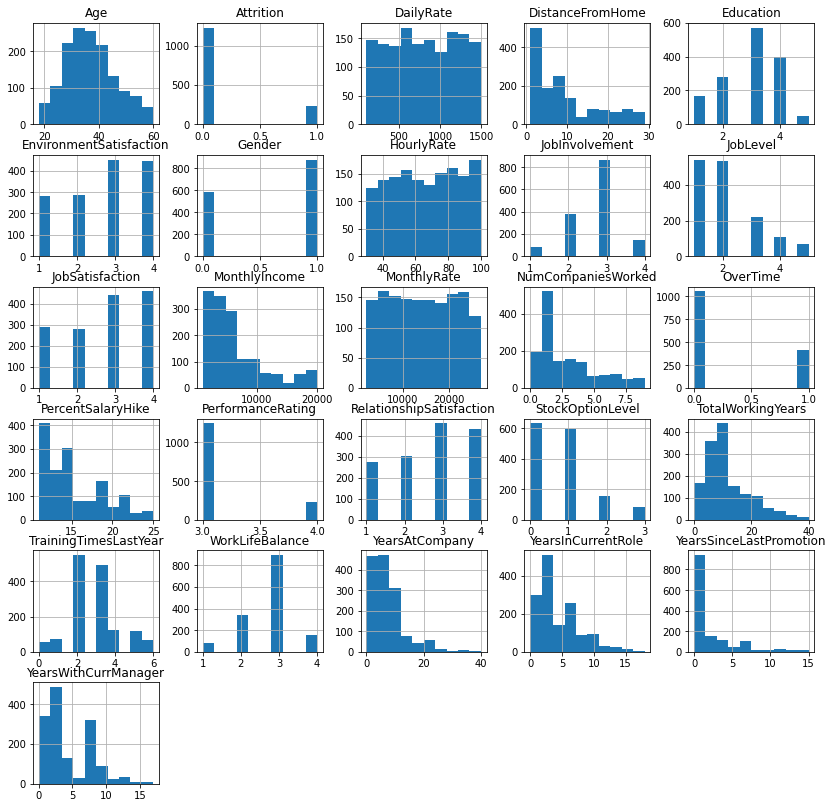

In [11]:
df.hist(figsize=(14,14))
plt.show()

Age, education, and job involvement appear to have a normal distribution. Some of our features are right skewed, including distance from home (indicating a majority of workers live nearer to work), monthly income, and years at the company. Our unknown values of "monthly rate" and "hourly rate" seem to have a similar distribution across all bins of their respective histograms, and these distributions do not seem to match with the distribution of any of our other variables, e.g. monthly income which is right skewed. It is therefore not clear if these 'rates' are really related to anything else (e.g., income).

Visualizing the distribution of some of our categorical variables:

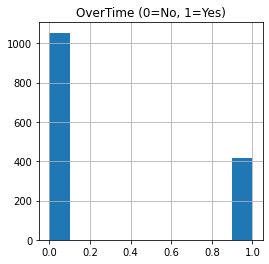

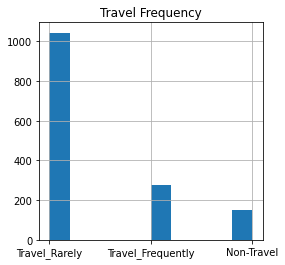

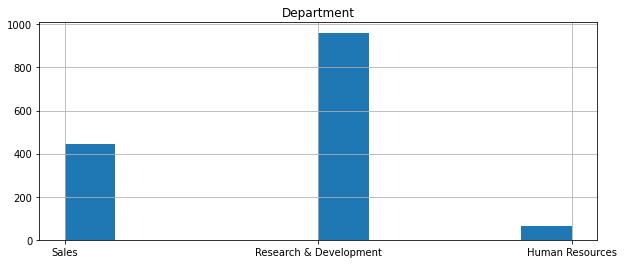

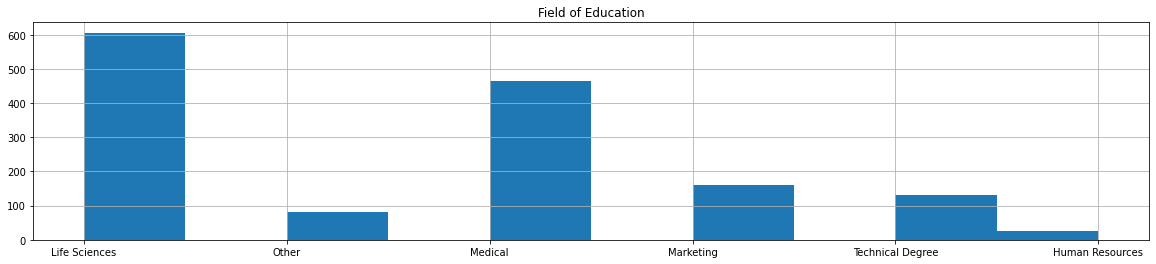

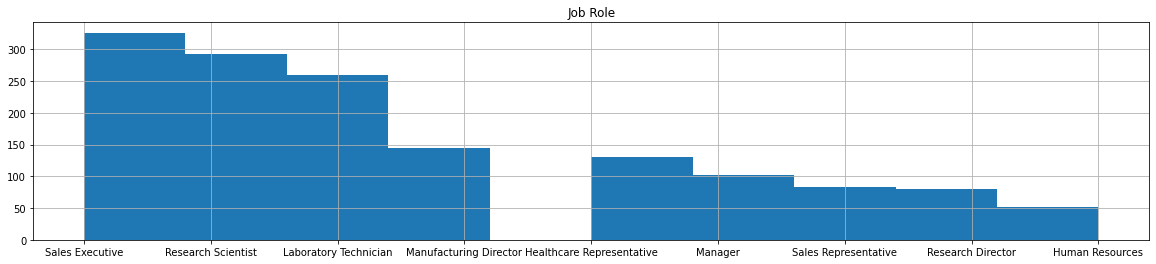

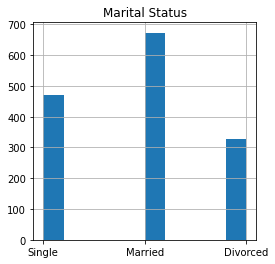

In [12]:
df['OverTime'].hist(figsize=(4,4))
plt.title("OverTime (0=No, 1=Yes)")
plt.show()

df['BusinessTravel'].hist(figsize=(4,4))
plt.title("Travel Frequency")
plt.show()

df['Department'].hist(figsize=(10,4))
plt.title("Department")
plt.show()

df['EducationField'].hist(figsize=(20,4))
plt.title("Field of Education")
plt.show()

df['JobRole'].hist(figsize=(20,4))
plt.title("Job Role")
plt.show()

df['MaritalStatus'].hist(figsize=(4,4))
plt.title("Marital Status")
plt.show()

We see that the most number of employees work in research and development followed by sales. Most are married, which might also make sense with our median age observed earlier. Most employees do not work overtime but a sizeable number do. We also see that most employees rarely travel.

**Let's now see a correlation matrix to see how attrition is connected to other variables.**

<AxesSubplot:>

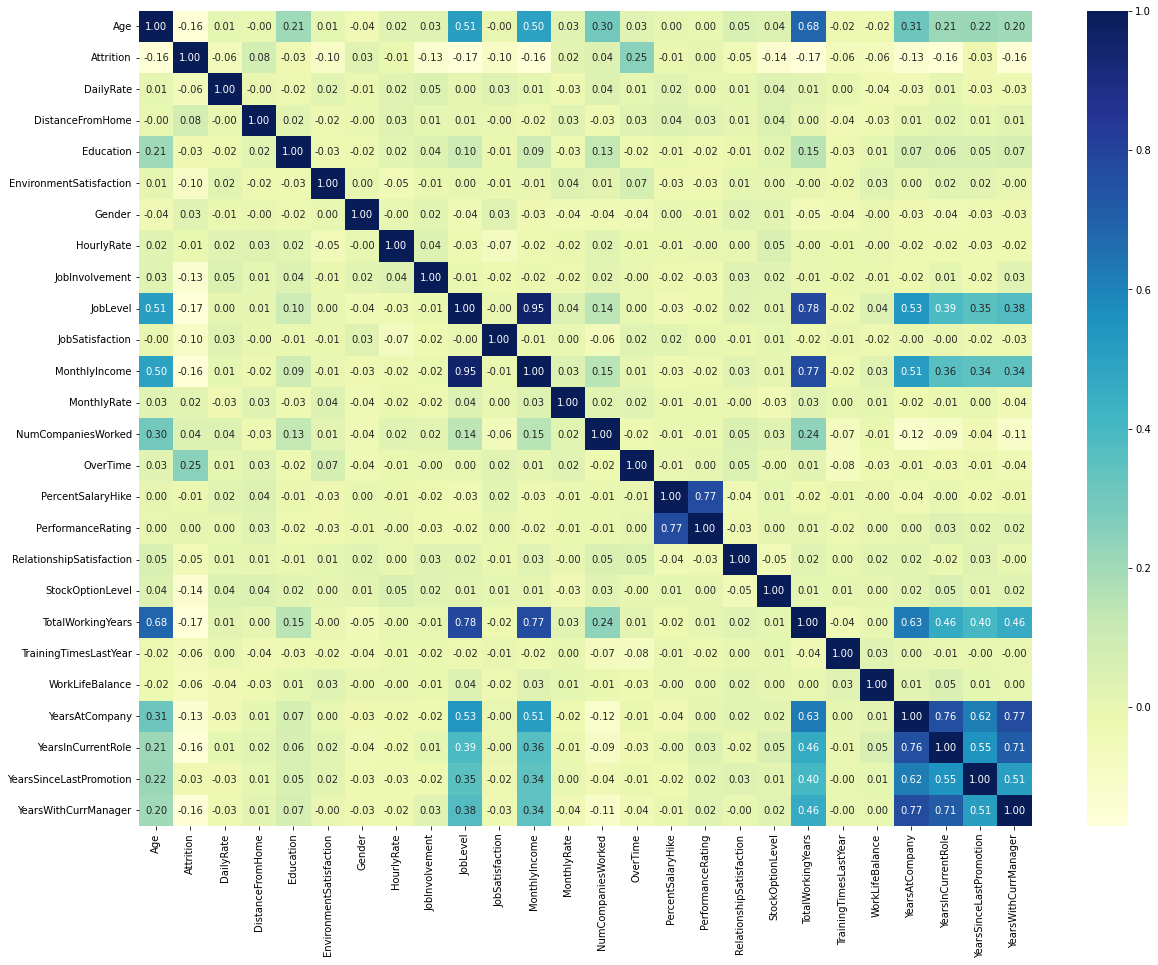

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

Some variables do have noteworthy correlation with attrition. An employee's status as working over time, e.g., has some positive correlation with attrition. There is negative correlation between total working years & attrition, monthly income & attrition, job level & attrition, and age & attrition. The positive correlation with working over time and correlation, along with the negative correlations noted for the other variables make sense. For example, having less of a salary would make one less committed to remain with a company, as would being a relatively newer employee (i.e. having less total working years). Let's see how attrition manifests in some of these variables:

### Visualizing how attrition plays out with select variables:

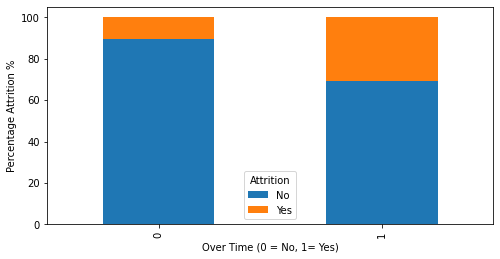

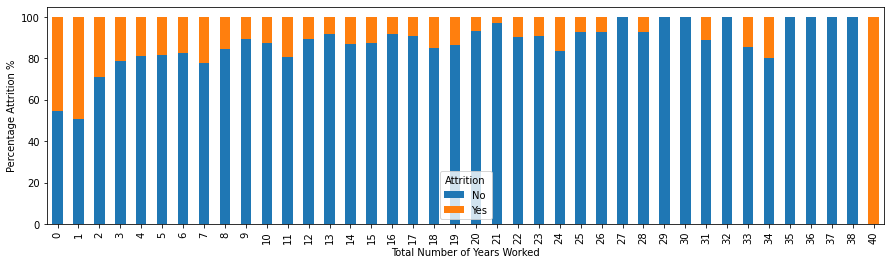

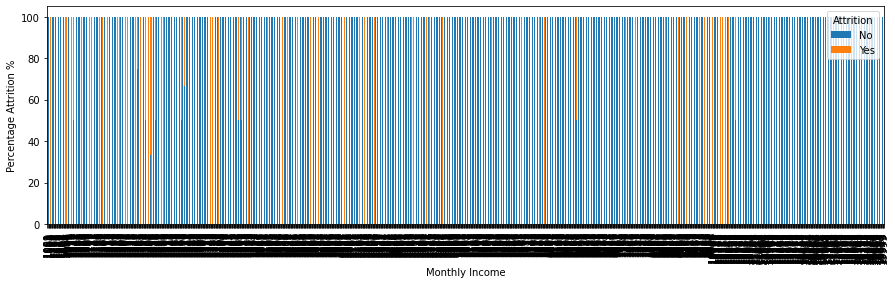

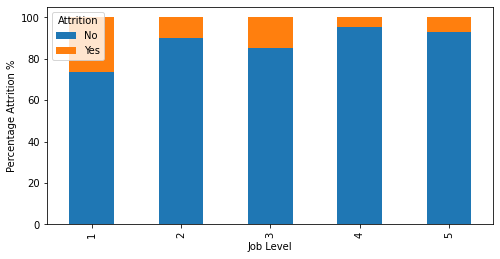

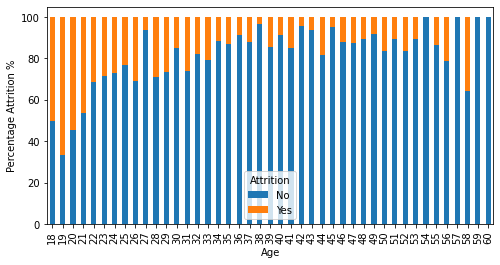

In [14]:
(pd.crosstab(df['OverTime'],df['Attrition'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.xlabel('Over Time (0 = No, 1= Yes)')
plt.legend(title="Attrition", labels=('No','Yes'))
plt.show()

(pd.crosstab(df['TotalWorkingYears'],df['Attrition'],normalize='index')*100).plot(kind='bar',figsize=(15,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.xlabel('Total Number of Years Worked')
plt.legend(title="Attrition", labels=('No','Yes'))
plt.show()

(pd.crosstab(df['MonthlyIncome'],df['Attrition'],normalize='index')*100).plot(kind='bar',figsize=(15,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.xlabel('Monthly Income')
plt.legend(title="Attrition", labels=('No','Yes'))
plt.show()

(pd.crosstab(df['JobLevel'],df['Attrition'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.xlabel('Job Level')
plt.legend(title="Attrition", labels=('No','Yes'))
plt.show()

(pd.crosstab(df['Age'],df['Attrition'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.xlabel('Age')
plt.legend(title="Attrition", labels=('No','Yes'))
plt.show()

Our visualizations confirm our previous comments about the positive correlation between attrition and working over time, and the negative correlation between attrition and the other variables noted. Note that the x-axis labels for monthly income are not visible for the obvious reason that there are many unique income values for this continuous variable, but the visualization should show how the orange coloring (representing attrition) seems more concentrated in the lower monthly incomes.

**The average values for those who attrite (1) and those who do not (0), separated out by variable:**

In [15]:
#Mean of numerical variables grouped by attrition
df.groupby(['Attrition']).mean().T

Attrition,0,1
Age,37.561233,33.607595
DailyRate,812.504461,750.362869
DistanceFromHome,8.915653,10.632911
Education,2.927007,2.839662
EnvironmentSatisfaction,2.771290,2.464135
Gender,0.593674,0.632911
HourlyRate,65.952149,65.573840
JobInvolvement,2.770479,2.518987
JobLevel,2.145985,1.637131
JobSatisfaction,2.778589,2.468354


It is clear to see from these averaged values for employees who attrite and those who do not, that the two sets of employees differ for many of these variables. For example, those who attrite have, ON AVERAGE, lower stock option levels, are more likely to work overtime, have a lower average monthly income, are younger, live slightly farther away from work, are slightly less satisfied with their job, environment, relationships, and work-life balance. They have also worked less time at the company on average.

## Building Our Models and Tuning for Improved Recall

###  Preparing data for modeling

Some of our categorical variables where we do not want to indicate ordinality should be split into get_dummy columns, including BusinessTravel, Department, Education, EducationField, JobInvolvement, JobLevel, JobRole, and MaritalStatus.

In [16]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,...,4,4,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,...,3,2,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,...,3,3,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2


In [17]:
# list of columns for categorical variables we want get_dummy columns for
dummy_variables = ['BusinessTravel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'Department','Education', 'EducationField', 'Gender',  'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus']

# creating get_dummy columns
df = pd.get_dummies(data=df, columns=dummy_variables)

df.head()

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,1102,1,94,5993,19479,8,1,11,...,0,0,0,0,0,1,0,0,0,1
2,49,0,279,8,61,5130,24907,1,0,23,...,0,0,0,0,1,0,0,0,1,0
4,37,1,1373,2,92,2090,2396,6,1,15,...,1,0,0,0,0,0,0,0,0,1
5,33,0,1392,3,56,2909,23159,1,1,11,...,0,0,0,0,1,0,0,0,1,0
7,27,0,591,2,40,3468,16632,9,0,12,...,1,0,0,0,0,0,0,0,1,0


**Separating our independent (X) and dependent (Y) variables**

In [18]:
X=df.drop(columns = ['Attrition'])
y=df['Attrition']

In [19]:
X.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,TotalWorkingYears,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,94,5993,19479,8,1,11,8,...,0,0,0,0,0,1,0,0,0,1
2,49,279,8,61,5130,24907,1,0,23,10,...,0,0,0,0,1,0,0,0,1,0
4,37,1373,2,92,2090,2396,6,1,15,7,...,1,0,0,0,0,0,0,0,0,1
5,33,1392,3,56,2909,23159,1,1,11,8,...,0,0,0,0,1,0,0,0,1,0
7,27,591,2,40,3468,16632,9,0,12,6,...,1,0,0,0,0,0,0,0,1,0


In [20]:
y.head()

EmployeeNumber
1    1
2    0
4    1
5    0
7    0
Name: Attrition, dtype: int64

Because our independent variables are in different magnitudes (e.g., the range of income values is much higher than our gender values which are only 0 and 1), our algorithm may incorrectly give weight to variables based on their higher magnitude. So we will scale all of our non-categorical values with the StandardScaler class. The scaler will ultimately make the standard deviation = 1, and mean = 0 for our values.

In [21]:
#Let's see what columns we have to determine what should be scaled:
X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'EnvironmentSatisfaction_1',
       'EnvironmentSatisfaction_2', 'EnvironmentSatisfaction_3',
       'EnvironmentSatisfaction_4', 'JobSatisfaction_1', 'JobSatisfaction_2',
       'JobSatisfaction_3', 'JobSatisfaction_4', 'WorkLifeBalance_1',
       'WorkLifeBalance_2', 'WorkLifeBalance_3', 'WorkLifeBalance_4',
       'PerformanceRating_3', 'PerformanceRating_4',
       'RelationshipSatisfaction_1', 'RelationshipSatisfaction_2',
       'RelationshipSatisfaction_3', 'RelationshipSatisfaction_4',
       'StockOptionLevel_0', 'StockOptionLevel_1', 'StockOptionLevel_2',
       'Sto

In [22]:
# Scaling the numeric data in our X data

scaler=StandardScaler()

X_scaled = X
X_scaled[['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
          'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
          'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
          'YearsSinceLastPromotion', 'YearsWithCurrManager']] = scaler.fit_transform(X_scaled[['Age',
            'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
              'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
              'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
              'YearsSinceLastPromotion', 'YearsWithCurrManager']])

X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

X_scaled

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,TotalWorkingYears,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,2.125136,1,-1.150554,-0.421642,...,0,0,0,0,0,1,0,0,0,1
2,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.678049,0,2.129306,-0.164511,...,0,0,0,0,1,0,0,0,1,0
4,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,1.324226,1,-0.057267,-0.550208,...,1,0,0,0,0,0,0,0,0,1
5,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.678049,1,-1.150554,-0.421642,...,0,0,0,0,1,0,0,0,1,0
7,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,2.525591,0,-0.877232,-0.678774,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,-0.101159,0.202082,1.703764,-1.224807,-0.835451,-0.284329,0.523316,0,0.489376,0.735447,...,1,0,0,0,0,0,0,0,1,0
2062,0.227347,-0.469754,-0.393938,-1.175601,0.741140,1.004010,0.523316,0,-0.057267,-0.293077,...,0,0,0,0,0,0,0,0,1,0
2064,-1.086676,-1.605183,-0.640727,1.038693,-0.076690,-1.284418,-0.678049,1,1.309341,-0.678774,...,0,0,1,0,0,0,0,0,1,0


### Splitting into Train/Test Data [80%/20%]

In classification problems like the one we are dealing with, our test and train data need to be appropriately sampled or we may end up with an inbalance in the distribution of classes. One method of addressing this is with a method known as a ``stratified sampling`` technique, which will be passed as an argument in the train_test_split function below. For more information, see [here](https://scikit-learn.org/stable/modules/cross_validation.html#stratification). Note that while stratified sampling ensures we have similar proportions of our classes in the train and test data, it doesn't solve the problem of major imbalances that may occur in the representation of classes in a dataset.

In [23]:
# Splitting the data and imprementing stratified sampling by setting stratify=y, which will make sure our y_test and 
# y_train will have similar proportions of our attrition classes

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=12,stratify=y)

In [24]:
# To verify that stratified sampling worked, let's look at the proportion of attritions to non-attritions
# in our y-train:

len(y_train[y_train==1])/len(y_train[y_train==0])

0.1926977687626775

In [25]:
# And we see that it's almost the same as our y_test:

len(y_test[y_test==1])/len(y_test[y_test==0])

0.1902834008097166

While 20% is obviously a low number, it is not an extreme case of imbalance, and so for the purposes of this study we will not be balancing out the representation of "Attrite" and "Not Attrite" classes through available methods to do this.

Moving on to our data at hand, it's important that our metrics align with our objectives. In this classification case, we want to especially reduce false negatives predicted by our model, i.e. we want to reduce the time the model says an employee won't attrite when in fact they **do** attrite. In a real life situation making the opposite prediction mistake is less costly (predicting someone **will** attrite when they actually do not). Because we want to ``reduce false negatives`` we have to focus on improving our ``recall`` metric. Recall finds what proportion those predicted to be attriting were out of the entire propulation of those who in fact did attrite. So the lower the number of predicted attritions over actual attritions, the more false negatives. The higher the number of predicted attritions over actual attritions, the fewer false negatives, which is what we want. Our evaluation metrics will therefore take into account recall.

In [26]:
# creating a metric function that takes the actual and the predicted values, and returns the Scikit learn
# classification report and a heatmap based on the confusion matrix (both described below)
def metrics(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite (0)', 'Attrite (1)'], yticklabels=['Not Attrite (0)', 'Attrite (1)'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Building the models

I will build and compare 2 different models:
- **Logistic Regression**
- **Support Vector Machine(SVM)**

## Logistic Regression Model

In [27]:
# instantiating our logistric regression and fitting the model to the train data
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       986
           1       0.82      0.53      0.65       190

    accuracy                           0.91      1176
   macro avg       0.87      0.75      0.80      1176
weighted avg       0.90      0.91      0.90      1176



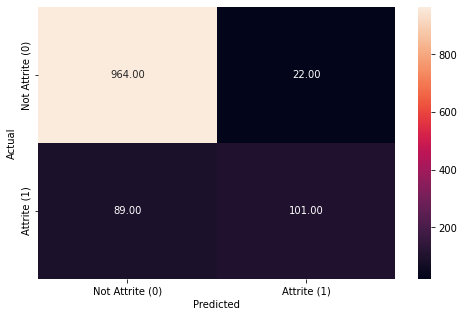

In [28]:
# checking performance on the training data
y_train_pred = lr.predict(X_train)
metrics(y_train, y_train_pred)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.78      0.38      0.51        47

    accuracy                           0.88       294
   macro avg       0.84      0.68      0.72       294
weighted avg       0.88      0.88      0.87       294



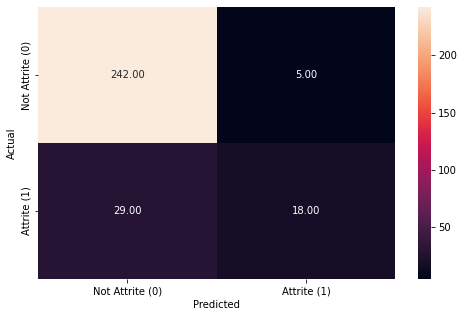

In [29]:
# checking performance on the test dataset
y_test_pred = lr.predict(X_test)
metrics(y_test, y_test_pred)

**Here is an explanation of the values in the printed classification report:**
- 0 represents the class "Not attrite", 1 represents the class "Attrite"
- `precision` is the proportion of positive identifications that were correct. A precision of 1.0 means no false positives.
- `recall` is the proportion of positives which were correctly predicted out of all the true positives. A recall of 1.0 means no false negatives.
- `f1 score` combines the precision and recall scores
- `support` is the number of items that the metric was built on
- `accuracy` is the accuracy of the model
- `macro avg` scores are the average precision/recall/f1 scores between classes. It doesn't take into account class imbalance. In our case above, there is class imbalance since a majority of cases are classed as '0' and not '1'.
- `weighted avg` scores are the average precision/recall/f1 scores between classes, which gives weight to the classes based on their sample sizes. Because of the relative representational imbalance in our data between classes, weighted avg should be prefered in this case.

**Regarding our confusion matrix:**
- The heatmap lets us explore the number of true/false positives/negatives.

**Observations based on our results:**

Based on the above metrics, we see that our train and test predictions have similar accuracy of close to 90%. However, the recall metric for class 1 (will attrite) is only about 50% for our train data, and less than 40% for our test. This means we have a sizeable number of false negatives, and thus the model is not satisfactory, since there are many employees who will attrite that this model cannot catch, and this is the case even though the overall accuracy appears to be good. As one can see from teh heat map, there are a sizeable number of false negatives that need to be reduced (predicted: "Not Attrite"; actual: "Attrite"). This can be done by **responsibly** reducing recall.

**We now refer to the method coef_ which gives us the variables most significant for classifying our y variable of attrition.**

In [30]:
# finding the coefficients of our logistic regression model and ordering them by significance
X_columns = X.columns

coef_lr = lr.coef_

# allowing to see all of our rows:
pd.set_option('display.max_rows', None)

pd.DataFrame(coef_lr, columns=X_columns).T.sort_values(by=0,ascending=False)

,0
OverTime,1.898805
JobInvolvement_1,1.134276
JobLevel_5,1.117030
BusinessTravel_Travel_Frequently,0.856694
StockOptionLevel_0,0.784258
EnvironmentSatisfaction_1,0.744762
EducationField_Technical Degree,0.684411
WorkLifeBalance_1,0.666428
YearsAtCompany,0.661752
JobSatisfaction_1,0.642984


Based on the above, we find that the features that most **positively effect** the likelihood of an employee leaving the company are those listed on the top (e.g., overtime, having a job involvement score of 1, a job level of 5, highly frequent travel for the company, etc.). Those that have a **negative effect** are those listed at the bottom of the list (e.g., having a job level of 2, a stock option of 2, not traveling for the business, having a job level of 4, etc). Overtime is the most important feature resulting in attrition based on our model. We also see how having a stock option of 0 appears to have a significant impact. The company may want to explore its overtime and stock option policies for employees. Being a newer employee (job level of 1) would also be a flag, as would having worked at many companies before. We can see that these values seem to make sense with the correlation matrix we observed earlier as well, in addition to our own intuition.

The coefficients obtained above for our logistic regression model give us a value that is the log of odds. Converting these values by determining their exponential will let us determine their real odds:

In [31]:
#finding the odds by finding the exponential values
odds = np.exp(lr.coef_[0])

# making a dataframe of the odds and sorting
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False) 

,odds
OverTime,6.677908
JobInvolvement_1,3.108922
JobLevel_5,3.055766
BusinessTravel_Travel_Frequently,2.355361
StockOptionLevel_0,2.190780
EnvironmentSatisfaction_1,2.105941
EducationField_Technical Degree,1.982603
WorkLifeBalance_1,1.947269
YearsAtCompany,1.938185
JobSatisfaction_1,1.902148


We can read the values above as telling us the X likelihood of someone attriting if they have a feature. E.g., an employee working overtime is 6.67 times more likely to attrite than someone who does not. Someone who's satisfaction with their personal relationship is scored as a 1 is 1.87 times more likely to attrite than someone with a different score, etc.

### Balancing Precision and Recall for the Best Predictions (Tuning Our Predictive Threshold)

The logistic regression model will determine the probability of each entity being labeled as 'attrite' or not. By default the `'threshold'` is 0.5, meaning that any time the probabilty of an entity being 'attrite' is 0.5 or higher, the model will label it as such. In cases of class imbalance (as we noticed our data had earlier), this default threshold may be poor. Adjusting it may improve our metric scores.

One of the tools to help us achieve this is the `precision recall curve`, which helps one see the tradeoff between precision and recall at different probability thresholds for a single class (in our case, "attrite"/1).

This is different from an ROC curve (ROC = "receiver operating characteristic"), which instead considers the false positive and true positive rate of the model.

In [32]:
# Creating precision-recall curve for our logistic regression model:

# predict_proba gives the probability of each observation belonging to either class of attrition [0, 1]:
y_scores_lr=lr.predict_proba(X_train)
y_scores_lr

array([[0.70647394, 0.29352606],
       [0.89205336, 0.10794664],
       [0.99527504, 0.00472496],
       ...,
       [0.88464202, 0.11535798],
       [0.83306736, 0.16693264],
       [0.84688581, 0.15311419]])

In [33]:
# We see how the above probabilities for a row being 
# either of the two classes [0, 1] result in the below outputs, which is our train data y predictions:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
# The following will compute precision-recall pairs for different probability thresholds:
precisions_lr, recalls_lr, thresholds_lr = precision_recall_curve(y_train, y_scores_lr[:,1])

In [35]:
# Note that the inputed "y_scores_lr[:,1]" is referring to the second column in the y_scores_lr array, i.e. 
# the probabilities of the observations being class 1 (i.e. "Attrite")

y_scores_lr[:,1]

array([0.29352606, 0.10794664, 0.00472496, ..., 0.11535798, 0.16693264,
       0.15311419])

In [36]:
# Here are the computed precision values
precisions_lr

array([0.16156463, 0.16170213, 0.16183986, ..., 1.        , 1.        ,
       1.        ])

In [37]:
# The computed recall values:
recalls_lr

array([1.        , 1.        , 1.        , ..., 0.01052632, 0.00526316,
       0.        ])

In [38]:
# And the thresholds that those precision-recall values were based on:
thresholds_lr

array([1.70291391e-05, 8.87346354e-05, 1.37396902e-04, ...,
       9.60710727e-01, 9.76933909e-01, 9.94279286e-01])

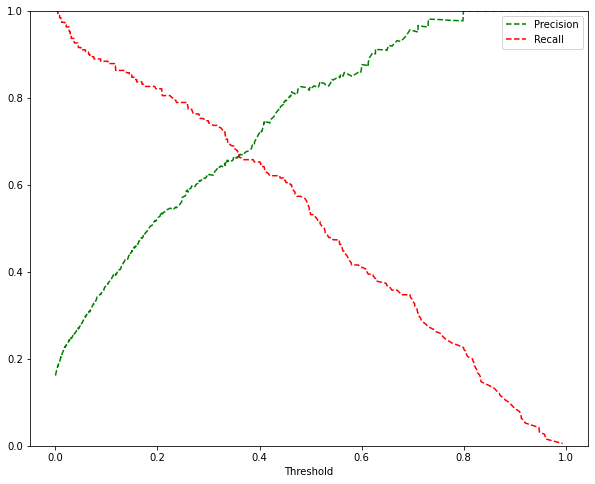

In [39]:
# Plot the values of our precision and recall value pairs for each of our thresholds
plt.figure(figsize=(10,8))
plt.plot(thresholds_lr, precisions_lr[:-1], 'g--', label='Precision')
plt.plot(thresholds_lr, recalls_lr[:-1], 'r--', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc='upper right')
plt.ylim([0,1])
plt.show()

In the curve, having a threshold of 0 would mean all of our instances would be classified as attrition by the algorithm (since anything over 0% probability of being a case of attrition would be labeled as such). This would of course result in poor precision (a little under 0.2 in the chart above), but not absolutely 0 precision, since this extreme threshold would still explain some of the data. But, it would also mean the lowest number of false negatives since all of the entities would be labeled with 'attrite', and thus our recall would be perfect, 1.0. But note that even though our recall would be perfect here, it would obviously refer to poor predictions because the precision is really bad.

On the other hand, having a very high threshold that approaches 1.0 would mean that only values at a stringent probability threshold would be mapped to the class of attrition. Our recall would head in the direction of 0 the higher the threshold, since a majority of entities would be labeled as 'no attrite' given the higher threshold to be deemed 'attrite'. This would thus result in very high numbers of false negatives, and thus a very low recall. On the converse, the precision would go up as the threshold goes higher. That is because precision is concerned with reducing false positives. The higher the probability threshold, the better precision. However, after a certain point, the threshold does not lead to better precision.

**We ultimately want to define our threshold to be at a point we can balance precision and recall, and according to the above chart, that is around 0.38. Let's see how it impacts the model:**

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       986
           1       0.68      0.66      0.67       190

    accuracy                           0.89      1176
   macro avg       0.81      0.80      0.80      1176
weighted avg       0.89      0.89      0.89      1176



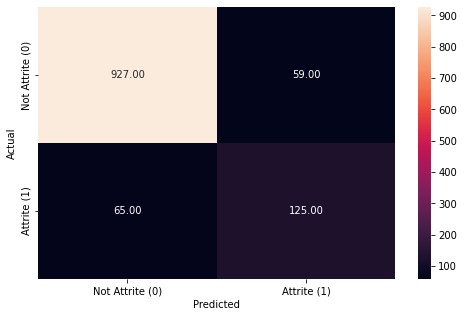

In [40]:
optimal_threshold1=.38

# We first redefine our y_train_pred, which originally gave our prediction of either 0 or 1 for each observaation,
# to now refer instead to an array containing prediction pairs for an observation either being [0 or 1].
# Thereafter in the metrics function we only refer to the second column of the array (which refers to the class 1,
# i.e, whether the observation is "Attrite"), and select only those values as 'Attrite' that are 
# above our NEW probability threshold of 0.38. Anything below this is classified as "Not Attrite"
y_train_pred = lr.predict_proba(X_train)
metrics(y_train, y_train_pred[:,1]>optimal_threshold1)

**The recall has improved for class 1 as can be seen in the heatmap. As expected, the precision has gone down (i.e. more false positives)**

Now let's see the results on our test data:

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       247
           1       0.59      0.49      0.53        47

    accuracy                           0.86       294
   macro avg       0.75      0.71      0.73       294
weighted avg       0.86      0.86      0.86       294



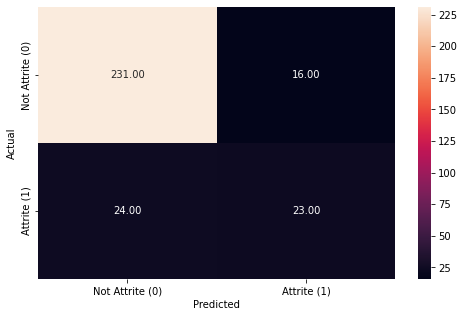

In [41]:
optimal_threshold1=.38
y_test_pred = lr.predict_proba(X_test)
metrics(y_test, y_test_pred[:,1]>optimal_threshold1)

**Similarly on our test data we see an improvement in our recall and reduction in our precision with our new threshold of 0.38**

## SVM Model

In [42]:
# instantiating our SVM model and fitting it to the train data
svm = SVC(kernel = 'linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       986
           1       0.85      0.56      0.68       190

    accuracy                           0.91      1176
   macro avg       0.89      0.77      0.81      1176
weighted avg       0.91      0.91      0.91      1176



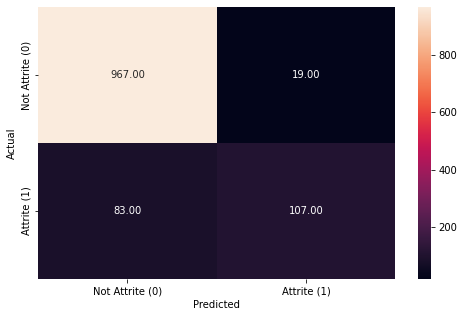

In [43]:
# metrics on train data:

y_train_svm_pred = svm.predict(X_train)
metrics(y_train, y_train_svm_pred)

For our class of 1, our SVM produced slightly better results than our train logistic regression model with the thresholds left unchanged.

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       247
           1       0.75      0.45      0.56        47

    accuracy                           0.89       294
   macro avg       0.83      0.71      0.75       294
weighted avg       0.88      0.89      0.88       294



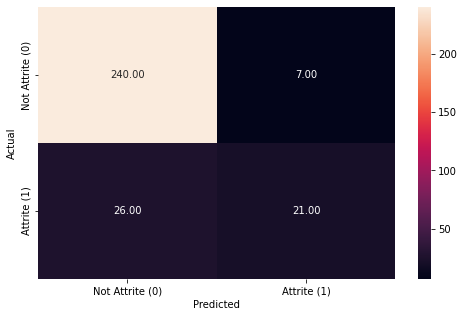

In [44]:
# metrics on test data
y_test_svm_pred = svm.predict(X_test)
metrics(y_test, y_test_svm_pred)

Our SVM model has a similar accuracy in both models, and thus there is not a big overfitting problem. The  recall is  better in this model's performance on the test data than was the case with the logistic regression model with the original thresholds, so we are moving in the direction of our original objective of reducing false negatives that will be costly for the company. Let us determine an optimal threshold for our model as we did before:

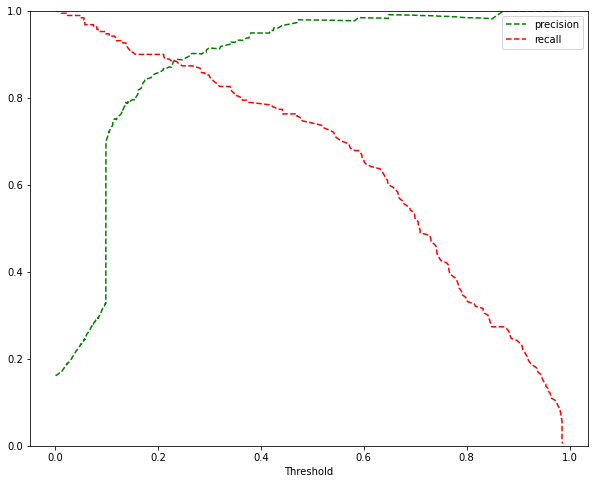

In [45]:
# We repeat what we did for the logistic regression model to find the precision_recall curve:

svm2=SVC(probability=True) # Setting to true enables probability estimates
svm2.fit(X_train,y_train)
svm_y_scores=svm2.predict_proba(X_train) # as noted earlier, predict_proba gives the probability of each classification

# calculating our precision and recall values for different thresholds for class 1:
svm_precisions, svm_recalls, svm_thresholds = precision_recall_curve(y_train, svm_y_scores[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,8))
plt.plot(svm_thresholds, svm_precisions[:-1], 'g--', label='precision')
plt.plot(svm_thresholds, svm_recalls[:-1], 'r--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper right')
plt.ylim([0,1])
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       986
           1       0.89      0.87      0.88       190

    accuracy                           0.96      1176
   macro avg       0.93      0.93      0.93      1176
weighted avg       0.96      0.96      0.96      1176



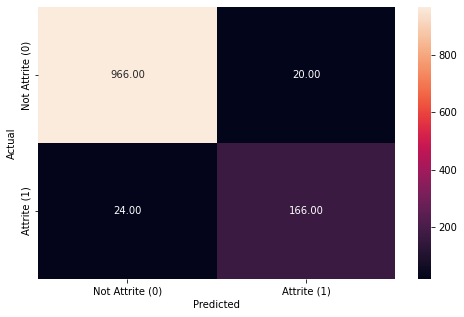

In [46]:
# Checking performance with a new threshold of 0.25:
optimal_threshold_svm=.25
y_train_pred = svm2.predict_proba(X_train)
metrics(y_train, y_train_pred[:,1]>optimal_threshold_svm)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       247
           1       0.57      0.55      0.56        47

    accuracy                           0.86       294
   macro avg       0.74      0.74      0.74       294
weighted avg       0.86      0.86      0.86       294



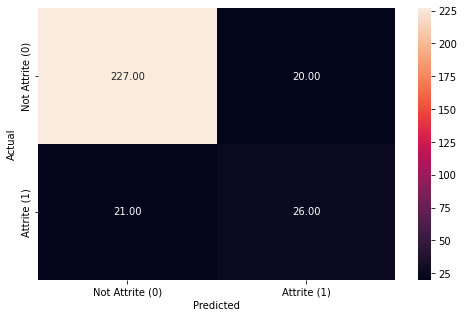

In [47]:
y_test_pred = svm2.predict_proba(X_test)
metrics(y_test, y_test_pred[:,1]>optimal_threshold_svm)

**Conclusion**

Compared to our baseline threshold model, the new threshold of 0.25 on our SVM model has improved our recall substantially (though with some reduction in precision as expected). Based on a discussion with company stakeholders, the SVM model may save the company money by identifying those who will likely attrite (to whom further resources can be allocated to keep them as employees), and reduces false negatives the most compared to all models looked at. Therefore, we recommend SVM with the given threshold as a starting point for the company to identify those at risk of attrition. Perhaps just as importantly, the above discussion of features and their respective coefficients derived from our Logistic Regression model have helped us identify several of the key factors that appear correlated to an employee leaving the company, including working over time, traveling frequently for work, how new an employee is to a company, an employee's monthly income, and which department they operate in, among others. These can all be addressed in different ways. New policies can be implemented to address these issues. These include:

Reducing the need for employees to work overtime, figuring out how employees can accomplish their tasks locally without having to travel extensively, developing programs to help newer employees better integrate into a positive work environment at the company, ensuring salaries are competitive where possible, investigating the culture of departments with greater employee attrition, etc.